In [1]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
polish_companies_bankruptcy = fetch_ucirepo(id=365) 

  


In [2]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)


In [3]:
type(polish_companies_bankruptcy)

ucimlrepo.dotdict.dotdict

In [4]:
polish_companies_bankruptcy.keys()

dict_keys(['data', 'metadata', 'variables'])

In [5]:
polish_companies_bankruptcy.variables

name     role        type demographic description units missing_values
0    year  Feature     Integer        None        None  None             no
1      A1  Feature  Continuous        None        None  None             no
2      A2  Feature  Continuous        None        None  None             no
3      A3  Feature  Continuous        None        None  None             no
4      A4  Feature  Continuous        None        None  None            yes
..    ...      ...         ...         ...         ...   ...            ...
61    A61  Feature  Continuous        None        None  None            yes
62    A62  Feature  Continuous        None        None  None             no
63    A63  Feature  Continuous        None        None  None            yes
64    A64  Feature  Continuous        None        None  None            yes
65  class   Target     Integer        None        None  None             no

[66 rows x 7 columns]

In [6]:
# Assign feature in DF
df = polish_companies_bankruptcy.data.features
print(type(df))
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
(43405, 65)


year        A1       A2       A3      A4       A5       A6        A7   
0     1  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  \
1     1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340   
2     1  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060   
3     1  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704   
4     1  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320   

        A8      A9  ...       A55       A56      A57      A58       A59   
0  1.33050  1.1389  ...  348690.0  0.121960  0.39718  0.87804  0.001924  \
1  0.99601  1.6996  ...    2304.6  0.121300  0.42002  0.85300  0.000000   
2  0.43695  1.3090  ...    6332.7  0.241140  0.81774  0.76599  0.694840   
3  1.86610  1.0571  ...   20545.0  0.054015  0.14207  0.94598  0.000000   
4  0.63070  1.1559  ...    3186.6  0.134850  0.48431  0.86515  0.124440   

      A60     A61      A62     A63      A64  
0  8.4160  5.1372   82.658  4.4158   7.4277  
1  4.1486  3.2732  107.350  3.4000  60.9870  
2  4.9909  3.9510  134.270  2.7185   5.2078  
3  4.5746  3.6147   86.435  4.2228   5.5497  
4  6.3985  4.3158  127.210  2.8692   7.8980  

[5 rows x 65 columns]

In [7]:
# Assign target in y
y = polish_companies_bankruptcy.data.targets
print(type(y))
print(y.shape)
y.head()


<class 'pandas.core.frame.DataFrame'>
(43405, 1)


class
0      0
1      0
2      0
3      0
4      0

In [8]:
df = pd.concat([df,y],axis = 1)

In [9]:
print(df.shape)
df.head()

(43405, 66)


year        A1       A2       A3      A4       A5       A6        A7   
0     1  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  \
1     1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340   
2     1  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060   
3     1  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704   
4     1  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320   

        A8      A9  ...       A56      A57      A58       A59     A60     A61   
0  1.33050  1.1389  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372  \
1  0.99601  1.6996  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  0.43695  1.3090  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.86610  1.0571  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  0.63070  1.1559  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

       A62     A63      A64  class  
0   82.658  4.4158   7.4277      0  
1  107.350  3.4000  60.9870      0  
2  134.270  2.7185   5.2078      0  
3   86.435  4.2228   5.5497      0  
4  127.210  2.8692   7.8980      0  

[5 rows x 66 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43405 non-null  int64  
 1   A1      43397 non-null  float64
 2   A2      43397 non-null  float64
 3   A3      43397 non-null  float64
 4   A4      43271 non-null  float64
 5   A5      43316 non-null  float64
 6   A6      43397 non-null  float64
 7   A7      43397 non-null  float64
 8   A8      43311 non-null  float64
 9   A9      43396 non-null  float64
 10  A10     43397 non-null  float64
 11  A11     43361 non-null  float64
 12  A12     43271 non-null  float64
 13  A13     43278 non-null  float64
 14  A14     43397 non-null  float64
 15  A15     43369 non-null  float64
 16  A16     43310 non-null  float64
 17  A17     43311 non-null  float64
 18  A18     43397 non-null  float64
 19  A19     43277 non-null  float64
 20  A20     43278 non-null  float64
 21  A21     37551 non-null  float64
 22

In [11]:
# finding null values
print(df.shape)
df.isna().sum()


(43405, 66)


year       0
A1         8
A2         8
A3         8
A4       134
        ... 
A61      102
A62      127
A63      134
A64      812
class      0
Length: 66, dtype: int64

class
0    0.951826
1    0.048174
Name: proportion, dtype: float64


Text(0.5, 1.0, 'class balance')

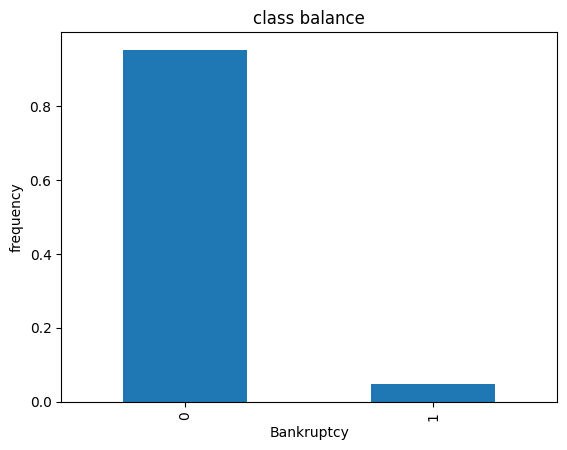

In [12]:
# class balance 
print(df["class"].value_counts(normalize = True))
df["class"].value_counts(normalize = True).plot(kind = "bar")
plt.xlabel("Bankruptcy")
plt.ylabel("frequency")
plt.title("class balance")

# positive class - bankruptcy = true - 1 - minority class
# negative class - bankruptcy = no - 0 - majority class

Text(0, 0.5, 'profit/expense')

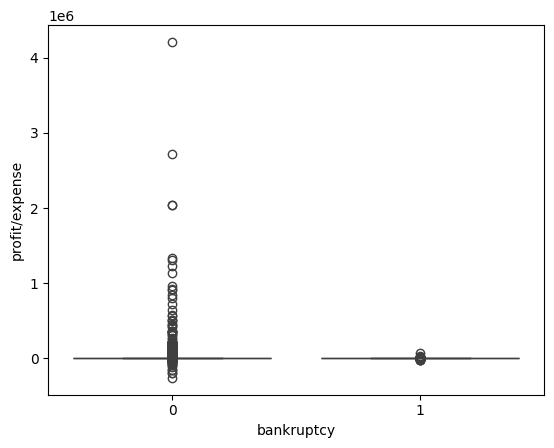

In [13]:
# side by side boxplot for bankruptcy and A27(profit by expense)
sns.boxplot(x = "class", y = "A27", data =  df)
plt.xlabel("bankruptcy")
plt.ylabel("profit/expense")

In [14]:
# A27 describe (mean, std)
df["A27"].describe().apply("{0:,.0f}".format)

count       40,641
mean         1,108
std         35,015
min       -259,000
25%              0
50%              1
75%              5
max      4,210,000
Name: A27, dtype: object

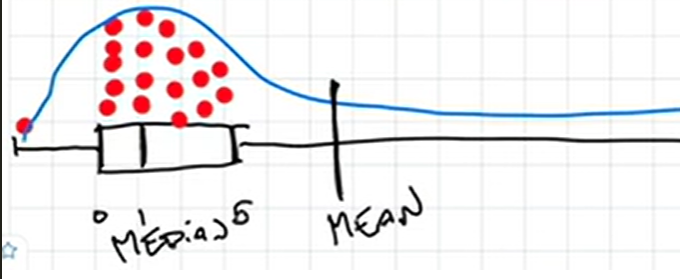

In [15]:
from IPython.display import Image

Image(filename="C:\\Users\\selva\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-03-29 192136.png")


Text(0, 0.5, 'frequency')

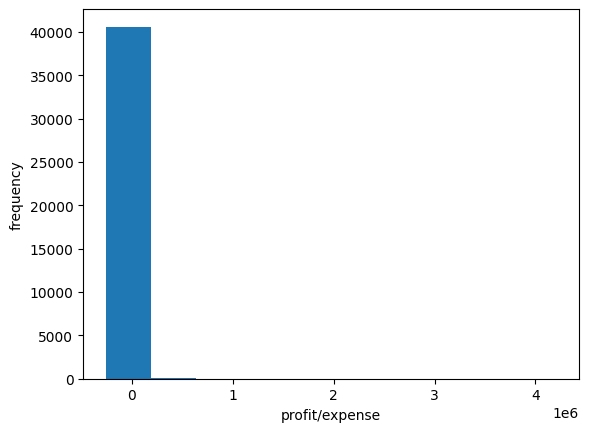

In [16]:
plt.hist(df["A27"])
plt.xlabel("profit/expense")
plt.ylabel("frequency")

In [16]:
q1, q2 = df["A27"].quantile([0.1,0.9])
mask = df["A27"].between(q1,q2)
mask.head()

0     True
1    False
2    False
3     True
4     True
Name: A27, dtype: bool

<Axes: xlabel='class', ylabel='A27'>

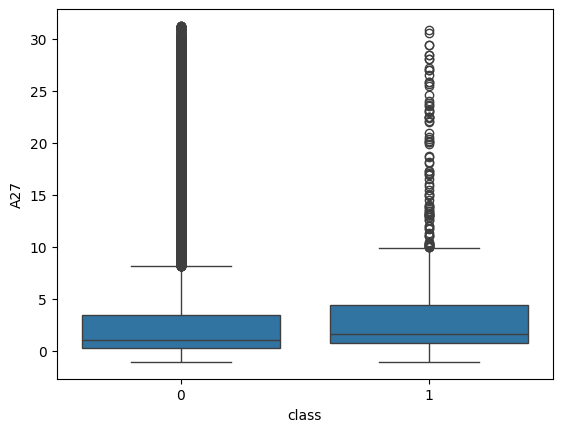

In [18]:
sns.boxplot(x= "class", y = "A27", data= df[mask])

<Axes: >

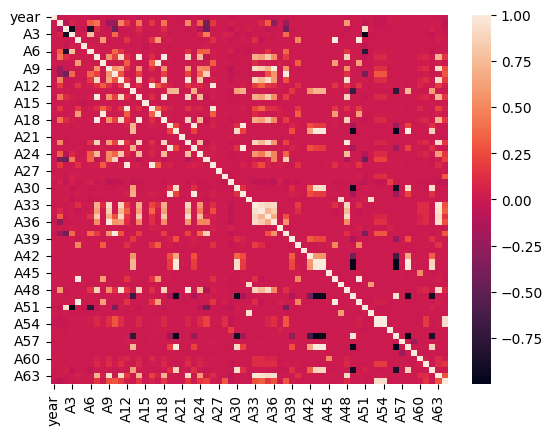

In [19]:
# multicollinearity
corr = df.drop(columns = ["class"]).corr()
sns.heatmap(corr)

In [15]:
# assign feature and target
X = df.drop(columns =["class"])
y = df["class"]
print(X.shape)
y.shape

(43405, 65)


(43405,)

In [16]:
# splitting

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


(26043, 65)
(26043,)
(8681, 65)
(8681,)
(8681, 65)
(8681,)


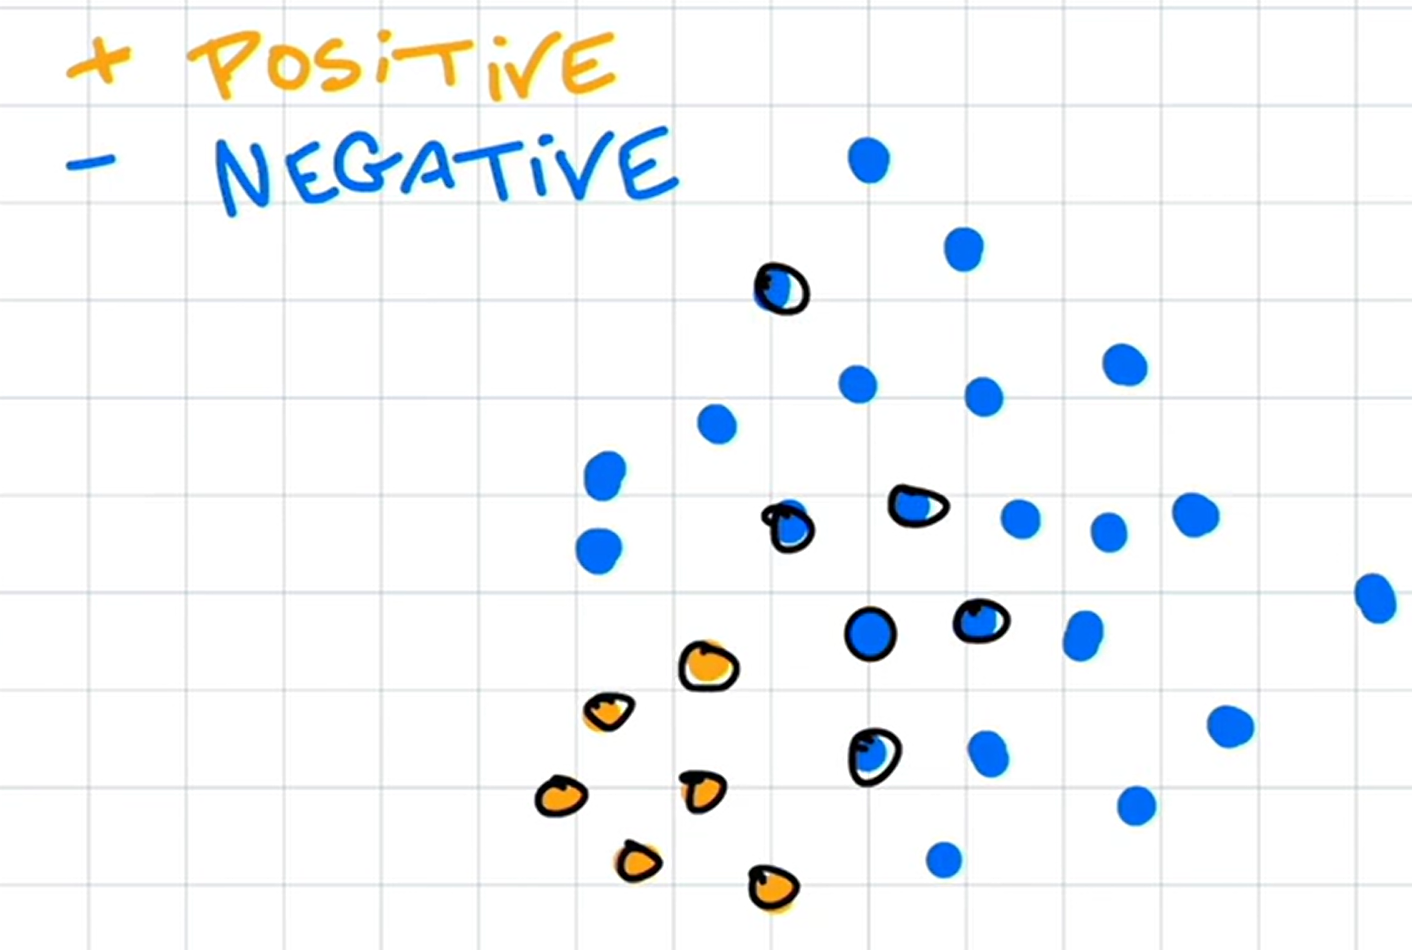

In [25]:
#undersampling
Image(filename="C:\\Users\\selva\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-04-03 105822.png")

In [19]:
# undersamling 
under_sample = RandomUnderSampler(random_state = 42)
X_train_under, y_train_under = under_sample.fit_resample(X_train,y_train)

print(X_train_under.shape)
print(y_train_under.shape)



(2522, 65)
(2522,)


Text(0.5, 1.0, 'class balance')

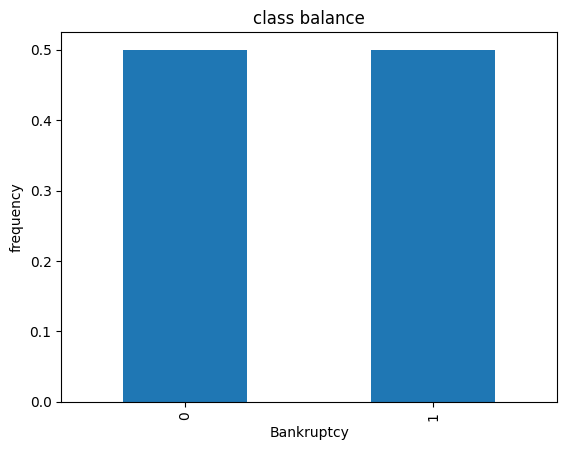

In [23]:
#X_train_under = pd.Series(X_train_under) 


y_train_under.value_counts(normalize = True)
y_train_under.value_counts(normalize = True).plot(kind="bar")
plt.xlabel("Bankruptcy")
plt.ylabel("frequency")
plt.title("class balance")

# positive class - bankruptcy = true - 1 - minority class
# negative class - bankruptcy = no - 0 - majority class


In [6]:
#oversampling 
Image(filename="C:\\Users\\selva\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-04-03 105324.png")

In [17]:
# oversamling 
over_sample = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sample.fit_resample(X_train,y_train)

print(X_train_over.shape)

print(y_train_over.shape)


(49564, 65)
(49564,)


Text(0.5, 1.0, 'class balance')

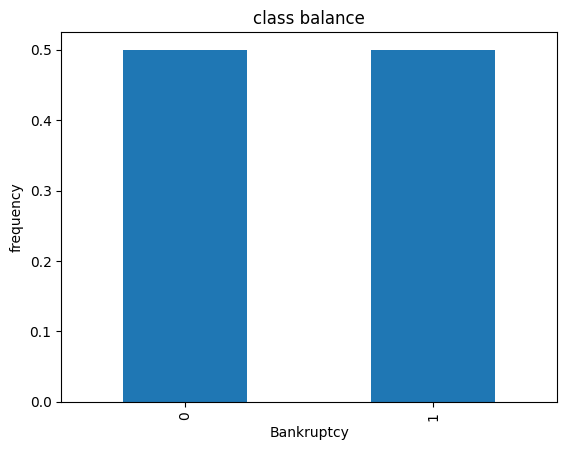

In [63]:

 

y_train_over.value_counts(normalize = True)
y_train_over.value_counts(normalize = True).plot(kind="bar")
plt.xlabel("Bankruptcy")
plt.ylabel("frequency")
plt.title("class balance")

# positive class - bankruptcy = true - 1 - minority class
# negative class - bankruptcy = no - 0 - majority class




In [25]:
# ML_workflow - baseline-model building-train-evaluate-hyperparameter tuning

baseline = y_train.value_counts(normalize = True).max()
baseline

0.9515800790999501

In [21]:
# model
clf = make_pipeline(SimpleImputer(strategy = "median"),xgb.XGBClassifier(random_state = 42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constrain

In [22]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv = 5, n_jobs = -1)

In [23]:
print(cv_acc_scores)

[0.99657016 0.99515787 0.99586402 0.99606577 0.99677159]


In [35]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "xgbclassifier__n_estimators": range(25, 100, 25),
    "xgbclassifier__max_depth": range(10, 50, 10)
}
params


{'simpleimputer__strategy': ['mean', 'median'],
 'xgbclassifier__n_estimators': range(25, 100, 25),
 'xgbclassifier__max_depth': range(10, 50, 10)}

In [36]:
# Grid search
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      gr...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'simpleimputer__strategy': ['mean', 'median'],
                         'xgbclassifier__max_depth': range(10, 50, 10),
                         'xgbclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [37]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      gr...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'simpleimputer__strategy': ['mean', 'median'],
                         'xgbclassifier__max_depth': range(10, 50, 10),
                         'xgbclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [39]:
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=75, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [40]:
acc_train = model.score(X_train_over, y_train_over)
acc_train

1.0

In [41]:
acc_test = model.score(X_test, y_test)
acc_test

0.9761548208731713

In [42]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [45]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8240
           1       0.88      0.62      0.73       441

    accuracy                           0.98      8681
   macro avg       0.93      0.81      0.86      8681
weighted avg       0.97      0.98      0.97      8681

